In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/items-orders/Orders data.xlsx
/kaggle/input/items-orders/Associated_Item_data.csv


In [2]:
#Load the Dataset "Orders"
orders = pd.read_excel(r'/kaggle/input/items-orders/Orders data.xlsx')

In [3]:
orders.head()

,order_date,order_id,order_number,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id
0,2025-04-03,136349,SO/25-26/000818,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,CLOSED,Noida,3
1,2025-01-30,110393,SO/24-25/90881,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,CLOSED,Greater NOIDA,6
2,2025-02-12,116427,SO/24-25/96511,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,CLOSED,Noida,3
3,2024-12-26,96182,SO/24-25/77411,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,CLOSED,Noida,3
4,2024-12-30,97858,SO/24-25/78975,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,CLOSED,Gomti Nagar,1


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64459 entries, 0 to 64458
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        64459 non-null  datetime64[ns]
 1   order_id          64459 non-null  int64         
 2   order_number      64459 non-null  object        
 3   customer_id       64459 non-null  int64         
 4   customer_name     64459 non-null  object        
 5   poc_name          64459 non-null  object        
 6   poc_id            64459 non-null  int64         
 7   amount            64459 non-null  float64       
 8   discount          64459 non-null  float64       
 9   net_order_amount  64459 non-null  float64       
 10  profit            64459 non-null  float64       
 11  order_status      64459 non-null  object        
 12  warehouse_name    64459 non-null  object        
 13  warehouse_id      64459 non-null  int64         
dtypes: datetime64[ns](1), 


1. No null records
2. Datatype looking fine

In [5]:
#Drop order_number - No useful information
orders = orders.drop(columns=['order_number'])

In [6]:
#Initialize sample
sample = orders.sample(20)

In [7]:
orders.sort_values(by='order_id').head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id
41046,2024-09-30,67415,6360,maniram store,Jaynendra Singh,6255,4420.0,370.0,4050.0,-30.0,CLOSED,Ayodhya,4
41047,2024-09-30,67428,5793,Verma Kirana Store Arkuna,Ayush Verma,4462,23000.0,1600.0,21400.0,-100.0,CLOSED,Ayodhya,4
41051,2024-09-30,67446,2227,Aryan Dudh Dairy,RAJAN SHUKLA,32,6780.0,360.0,6420.0,0.0,CLOSED,Telibagh,2
41054,2024-09-30,67480,5743,Jaiswal Bakery,Ayush Verma,4462,51000.0,2100.0,48900.0,900.0,CLOSED,Ayodhya,4
41053,2024-09-30,67488,6248,Pandey Enterprises,Raza Rizvi,5602,27800.0,1433.0,26367.0,142.0,CLOSED,Telibagh,2


In [8]:
orders['order_id'].duplicated().sum()

0

In [9]:
orders['customer_id'].duplicated().sum()

60298

In [10]:
orders['customer_name'].duplicated().sum()

60409

In [11]:
orders['poc_name'].duplicated().sum()

64365

In [12]:
orders['poc_id'].duplicated().sum()

64362

> **customer names are not uniquely mapped to customer IDs**
>
> 1. Different business having identical names - but have unique ids
> 2. One business multiple IDs 

In [13]:
# Find names that appear with multiple IDs
name_id_mapping = orders.groupby('customer_name')['customer_id'].nunique()
names_with_multiple_ids = name_id_mapping[name_id_mapping > 1].index.tolist()
len(names_with_multiple_ids)
names_with_multiple_ids

['93 Bataliyan CRPF',
 'A one biryani',
 'Ahmad Kirana Store',
 'Ajay Kirana Store',
 'Akash General Store',
 'Ankit General Store',
 'Anoop General Store',
 'Anoop Kirana Store',
 'Awasthi General Store',
 'Balaji Kirana Store',
 'Balaji Sweets',
 'Bangali Sweets',
 'Bhola Dhaba',
 'CHAURASIYA GENERAL STORE',
 'Champaran Meat House',
 'Deepak General Store',
 'Durgesh Kirana Store',
 'GUPTA GENERAL STORE',
 'Guddu general Store',
 'Gupta General Store',
 'Gupta Puri Bhandar',
 'Gupta sweet shop',
 'Harsh General Store',
 'Jagdeesh General Store',
 'Jai Ambey Traders',
 'Jaiswal General Store',
 'Jaiswal Kirana Store',
 'Janta Dhaba',
 'Janta General Store',
 'Khushi Kirana Store',
 'Krishna Enterprises',
 'M/S SWAD DAIRY AND SWEETS',
 'Mahadev Traders',
 'Mahi General Store',
 'Maurya Misthan Bhandar',
 'Mohan Kirana Store',
 'Mohit General Store',
 'Mukesh General Store',
 'Muradabadi Chicken Biryani',
 'Narayan Bhog',
 'Om General Store',
 'Pandey Kirana store',
 'Pizza Cave',
 'Pra

> 89 customers appeared with multiple IDs

In [14]:
unique_customers = orders['customer_id'].nunique()
print(f"{unique_customers} customers are found in the dataset")

4161 customers are found in the dataset


In [15]:
unique_customer_ids = orders['customer_id'].nunique()
print(f"{unique_customer_ids} unique customer_ids are found in the dataset" )

4161 unique customer_ids are found in the dataset


> There are unequal number of duplicates in the data, yet unique number of entries


Solution - Creating a primary_id_column, id with most customer orders

In [16]:
# Create a mapping of customer_name to primary customer_id
primary_id_mapping = {}

# For each customer_name, find the most frequently used customer_id
for name in orders['customer_name'].unique():
    name_subset = orders[orders['customer_name'] == name]
    # Get ID with most orders
    primary_id = name_subset['customer_id'].value_counts().idxmax()
    primary_id_mapping[name] = primary_id

# Add a new column for the mapped ID without changing original data
orders['primary_customer_id'] = orders['customer_name'].map(primary_id_mapping)
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,CLOSED,Noida,3,5235
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,CLOSED,Greater NOIDA,6,7622
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,CLOSED,Noida,3,3827
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,CLOSED,Noida,3,2223
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,CLOSED,Gomti Nagar,1,6903


In [17]:

print(
    orders['primary_customer_id'].duplicated().sum(),
    orders['customer_id'].duplicated().sum(),
    orders['customer_name'].duplicated().sum(),
    orders['primary_customer_id'].nunique(),
    orders['customer_name'].nunique(),
    orders['customer_id'].nunique()
)


60409 60298 60409 4050 4050 4161


In [18]:
orders.sort_values('customer_id')

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id
34604,2025-04-01,135467,1,Pinnacle Hotel,RAJAN SHUKLA,32,8930.0,1080.0,7850.0,-570.00,CLOSED,Telibagh,2,1
60058,2024-12-24,95101,1,Pinnacle Hotel,RAJAN SHUKLA,32,5074.0,224.0,4850.0,0.00,CLOSED,Telibagh,2,1
27953,2025-03-22,131815,1,Pinnacle Hotel,RAJAN SHUKLA,32,1700.0,60.0,1640.0,10.00,CLOSED,Telibagh,2,1
30199,2025-03-25,132768,1,Pinnacle Hotel,RAJAN SHUKLA,32,4488.7,598.7,3890.0,-465.03,CLOSED,Telibagh,2,1
40545,2024-10-09,70233,1,Pinnacle Hotel,RAJAN SHUKLA,32,3410.0,200.0,3210.0,20.00,CLOSED,Telibagh,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38442,2025-04-10,139286,9349,banarasiya jal pan,Hardeep Singh,9432,4720.0,360.0,4360.0,-20.00,CLOSED,Greater NOIDA,6,9349
38422,2025-04-10,139272,9350,Al Kabir Biryani,Mohit Negi,5183,1230.0,70.0,1160.0,5.00,CLOSED,Noida,3,9350
38498,2025-04-10,139277,9352,karan fast food,Abhay Shukla,35,3351.2,351.2,3000.0,-106.80,CLOSED,Noida,3,9352
38488,2025-04-10,139332,9358,jain store,Yash Pandey,51,27400.0,2400.0,25000.0,-200.00,OPEN,Noida,3,9358


In [19]:
orders['order_status'].value_counts()

order_status
CLOSED    64317
OPEN        142
Name: count, dtype: int64

In [20]:
orders['order_status'].dtype

dtype('O')

In [21]:
orders['order_status'] = orders['order_status'].map({'CLOSED':0, 'OPEN':1})
orders['order_status']

0        0
1        0
2        0
3        0
4        0
        ..
64454    0
64455    0
64456    0
64457    0
64458    0
Name: order_status, Length: 64459, dtype: int64

In [22]:
orders['order_status'].value_counts()

order_status
0    64317
1      142
Name: count, dtype: int64

In [23]:
orders.describe()

,order_date,order_id,customer_id,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_id,primary_customer_id
count,64459,64459.000000,64459.000000,64459.000000,6.445900e+04,64459.000000,64459.000000,64459.000000,64459.000000,64459.000000,64459.000000
mean,2025-01-10 01:02:21.019873024,103426.837307,4386.190447,2920.965466,1.606811e+04,1350.906929,14717.198282,-308.391379,0.002203,2.323043,4375.499713
min,2024-09-30 00:00:00,67415.000000,1.000000,2.000000,1.489000e+01,0.000000,14.890000,-86382.000000,0.000000,1.000000,1.000000
25%,2024-11-28 00:00:00,85413.500000,2355.000000,35.000000,2.260000e+03,150.000000,2090.000000,-203.340000,0.000000,1.000000,2355.000000
50%,2025-01-13 00:00:00,103379.000000,4541.000000,52.000000,5.113970e+03,375.000000,4680.000000,-50.000000,0.000000,2.000000,4500.000000
75%,2025-02-23 00:00:00,121395.500000,6216.000000,5602.000000,1.565000e+04,1200.000000,14333.000000,-5.000000,0.000000,3.000000,6212.000000
max,2025-04-10 00:00:00,139441.000000,9367.000000,9555.000000,1.010000e+06,389858.000000,950000.000000,84750.000000,1.000000,6.000000,9367.000000
std,NaN,20749.791913,2391.437029,3046.872786,3.308837e+04,3582.402681,30249.534820,1454.542967,0.046884,1.348273,2389.349369


In [24]:
Q3 = orders['amount'].quantile(0.75)
Q1 = orders['amount'].quantile(0.25)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL, LL)

35735.0 -17825.0


In [25]:
outlier_orders = orders[(orders['amount'] < LL) | (orders['amount'] > UL)]
print(f"{len(outlier_orders)} outlier orders found in the dataset, using the IQR method")

top_20_outliers = outlier_orders.sort_values('amount', ascending = False).head(50)
L = []
for i in top_20_outliers['order_id']:
    L.append(i)
print(L)

7128 outlier orders found in the dataset, using the IQR method
[67976, 67671, 103353, 103308, 135231, 86673, 86128, 136203, 138826, 134029, 93609, 126957, 138851, 102658, 115495, 125055, 119603, 132869, 127521, 126238, 125152, 119762, 121379, 126935, 79499, 119120, 132570, 107663, 78467, 74703, 132182, 130106, 118357, 121750, 97113, 118310, 102518, 97876, 100564, 117642, 100563, 118442, 75089, 87455, 78681, 85394, 100893, 99641, 133367, 99333]


In [26]:
items = pd.read_csv(r'/kaggle/input/items-orders/Associated_Item_data.csv')

agg_amount = items.groupby('order_id').agg(total_amount=('amount', 'sum')).reset_index()
Q3 = agg_amount['total_amount'].quantile(0.75)
Q1 = agg_amount['total_amount'].quantile(0.25)
IQR = Q3-Q1
Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print(Upper, Lower)

35735.0 -17825.0


In [27]:
outlier_orders = agg_amount[(agg_amount['total_amount'] < Lower) | (agg_amount['total_amount'] > Upper)]
outlier_orders = outlier_orders.sort_values('total_amount', ascending = False).head(50)
items_outliers = []
for j in outlier_orders['order_id']:
    items_outliers.append(j)
print(items_outliers)

[67976, 67671, 103308, 103353, 135231, 86673, 86128, 136203, 138826, 134029, 93609, 126957, 138851, 102658, 115495, 125055, 119603, 132869, 127521, 126238, 119762, 125152, 121379, 126935, 79499, 119120, 132570, 107663, 78467, 132182, 74703, 130106, 121750, 118442, 102518, 118357, 100563, 97876, 100564, 117642, 118310, 97113, 75089, 87455, 78681, 85394, 100893, 99641, 133367, 99333]


In [28]:
new_items = items[items['order_id'].isin(items_outliers)]

new_items[new_items['quantity'] != new_items['invoiced_quantity']]

,order_id,order_number,order_item_id,item_name,quantity,invoiced_quantity,mrp,price_per_unit,amount,discount_amount,profit
95124,126238,SO/24-25/105769,239625,7 Star Rice,90,0,1170.0,1020.0,105300.0,13500.0,-5400.0


In [29]:
new_items[new_items['quantity'] == new_items['invoiced_quantity']]

,order_id,order_number,order_item_id,item_name,quantity,invoiced_quantity,mrp,price_per_unit,amount,discount_amount,profit
1688,67671,SO/24-25/49334,136273,DCM Double Filter Sugar,300,300,2260.0,2109.0,678000.0,45300.0,-3300.0
2419,67976,SO/24-25/49668,136900,Kings Soya Pouch,500,500,2020.0,1900.0,1010000.0,60000.0,0.0
11337,75089,SO/24-25/56595,150211,Fryola Palm,200,200,2280.0,2120.0,456000.0,32000.0,-15000.0
14060,74703,SO/24-25/56230,149579,Fryola Palm,200,200,2300.0,2120.0,460000.0,36000.0,-5000.0
18586,79499,SO/24-25/60941,158083,Fortune Soya Tin(15L),200,200,2380.0,2175.0,476000.0,41000.0,-11000.0
...,...,...,...,...,...,...,...,...,...,...,...
108481,135231,SO/24-25/114397,255185,Fortune Soya Tin(15L),200,200,2250.0,2020.0,450000.0,46000.0,-24000.0
108839,132570,SO/24-25/111717,250600,Bawarchi Vanaspati Balti KG,50,50,2450.0,2310.0,122500.0,7000.0,-2250.0
110088,136203,SO/25-26/000693,256931,Fortune Soya Tin(13Kg),250,250,2172.0,2015.0,543000.0,39250.0,-1250.0
114193,138826,SO/25-26/003175,261515,Fortune Soya Tin(13Kg),250,250,2150.0,1981.0,537500.0,42250.0,-9750.0


> Among the top 50 exceptionally high orders, UnORG has successfully processed 98.57% orders, compared to 95.76% as the average fulfillment rate.

In [30]:
items[items['quantity'] != items['invoiced_quantity']]

,order_id,order_number,order_item_id,item_name,quantity,invoiced_quantity,mrp,price_per_unit,amount,discount_amount,profit
2,105873,SO/24-25/86555,205222,Arhar Dal,10,0,173.567,127.0,1735.67,465.67,-377.00
7,70649,SO/24-25/52293,141930,Prakash Aata,15,10,1690.000,1565.0,25350.00,1875.00,-75.00
17,70255,SO/24-25/51825,141233,Ashok Kali Mirch Powder (50 Gm),1,0,75.000,60.0,75.00,15.00,0.00
22,74887,SO/24-25/56444,149886,Rice MV Gold,3,2,1400.000,1340.0,4200.00,180.00,-36.00
178,78702,SO/24-25/60164,156656,Anchal Vanaspati Ghee Pouch,1,0,2880.000,2680.0,2880.00,200.00,-10.00
...,...,...,...,...,...,...,...,...,...,...,...
115088,139435,SO/25-26/003737,262494,SAPNA GOLD AATA,2,0,2010.000,1470.0,4020.00,1080.00,-780.00
115089,139433,SO/25-26/003738,262491,Hum Tum Rice,5,0,1390.000,1215.0,6950.00,875.00,-375.00
115090,139431,SO/25-26/003739,262489,Masodha Double Filter Sugar,4,0,2430.000,2210.0,9720.00,880.00,-160.00
115091,139430,SO/25-26/003740,262488,Matar,10,0,54.675,45.0,546.75,96.75,-56.75


In [31]:
items[items['quantity'] == items['invoiced_quantity']]

,order_id,order_number,order_item_id,item_name,quantity,invoiced_quantity,mrp,price_per_unit,amount,discount_amount,profit
0,104592,SO/24-25/85358,202967,Anannya Rice,2,2,1732.0,1534.0,3464.0,396.0,-208.0
1,74112,SO/24-25/55656,148560,Ambey Patent Maida,1,1,1899.0,1760.0,1899.0,139.0,-10.0
3,112302,SO/24-25/92717,216104,Kezar Maida,5,5,1760.0,1652.0,8800.0,540.0,-140.0
4,74308,SO/24-25/55887,148902,Normal Sugar,1,1,2190.0,2110.0,2190.0,80.0,40.0
5,83411,SO/24-25/64862,165258,Normal Sugar,1,1,2200.0,2045.0,2200.0,155.0,-35.0
...,...,...,...,...,...,...,...,...,...,...,...
115073,139432,SO/25-26/003712,262490,Fortune Soya Tin(13Kg),20,20,2150.0,2010.0,43000.0,2800.0,-200.0
115074,139440,SO/25-26/003713,262502,Ruchi Gold Palm Pouch(1L),10,10,1250.0,1145.0,12500.0,1050.0,-150.0
115075,139440,SO/25-26/003713,262503,NR Atta,2,2,1410.0,1300.0,2820.0,220.0,0.0
115076,139440,SO/25-26/003713,262504,Deepak Aata,1,1,1600.0,1480.0,1600.0,120.0,0.0


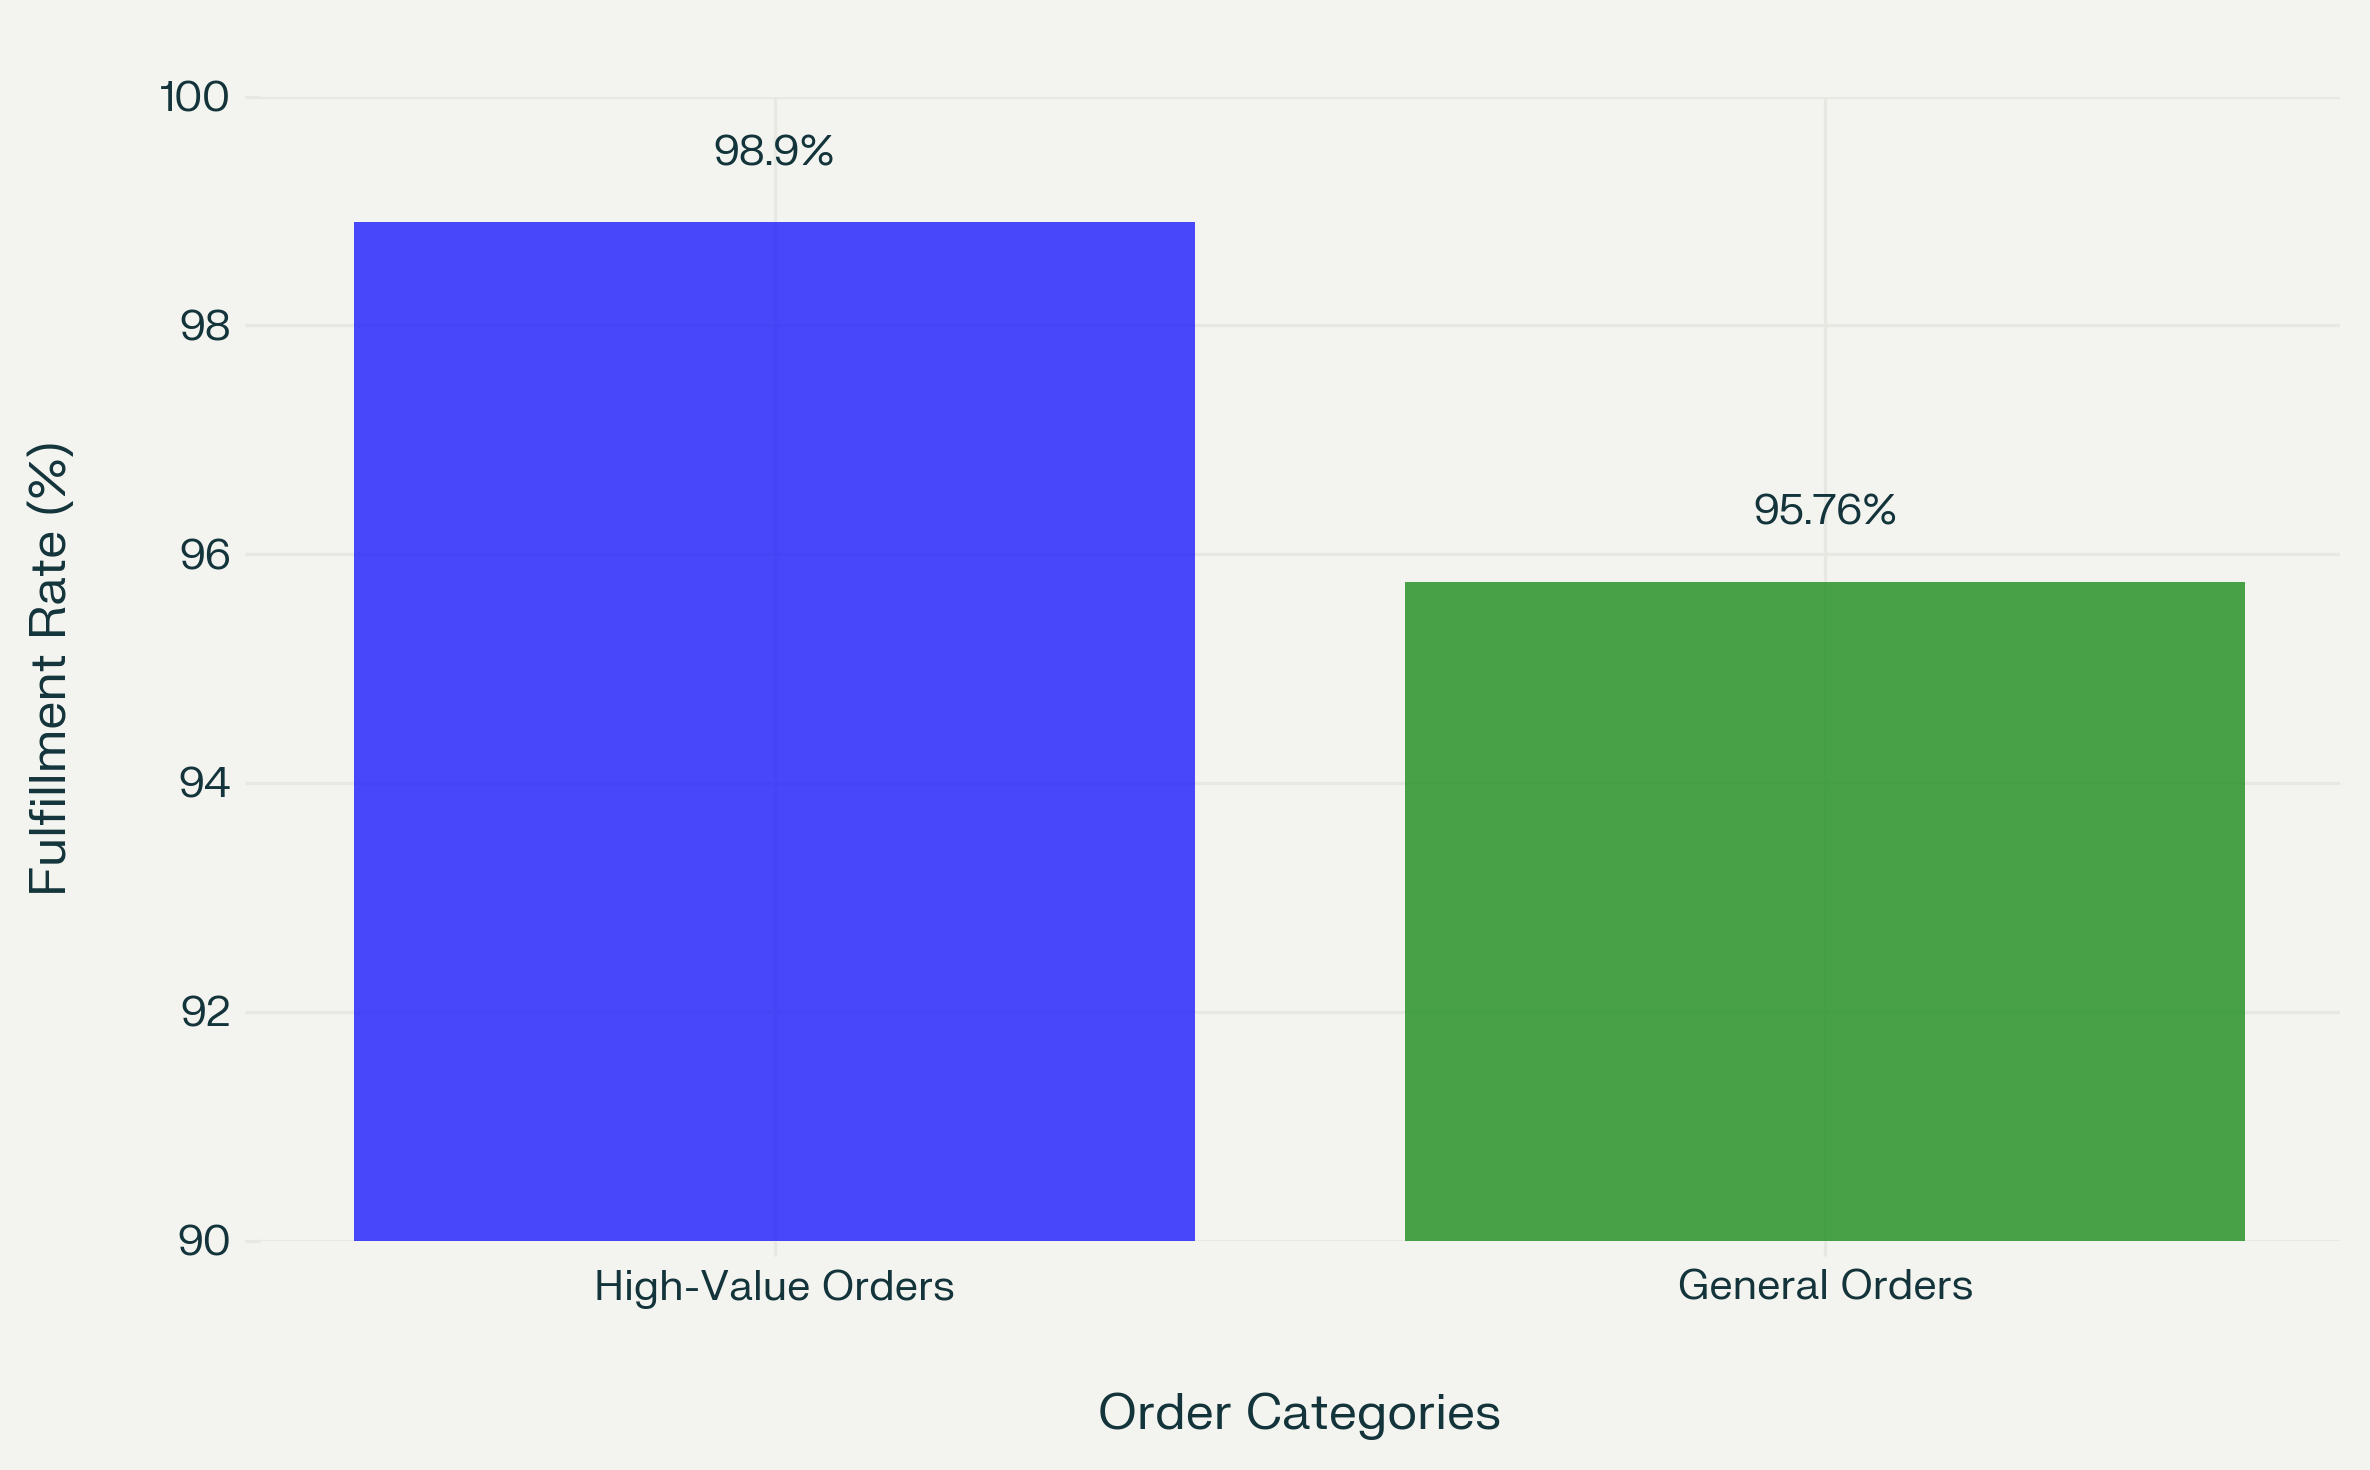
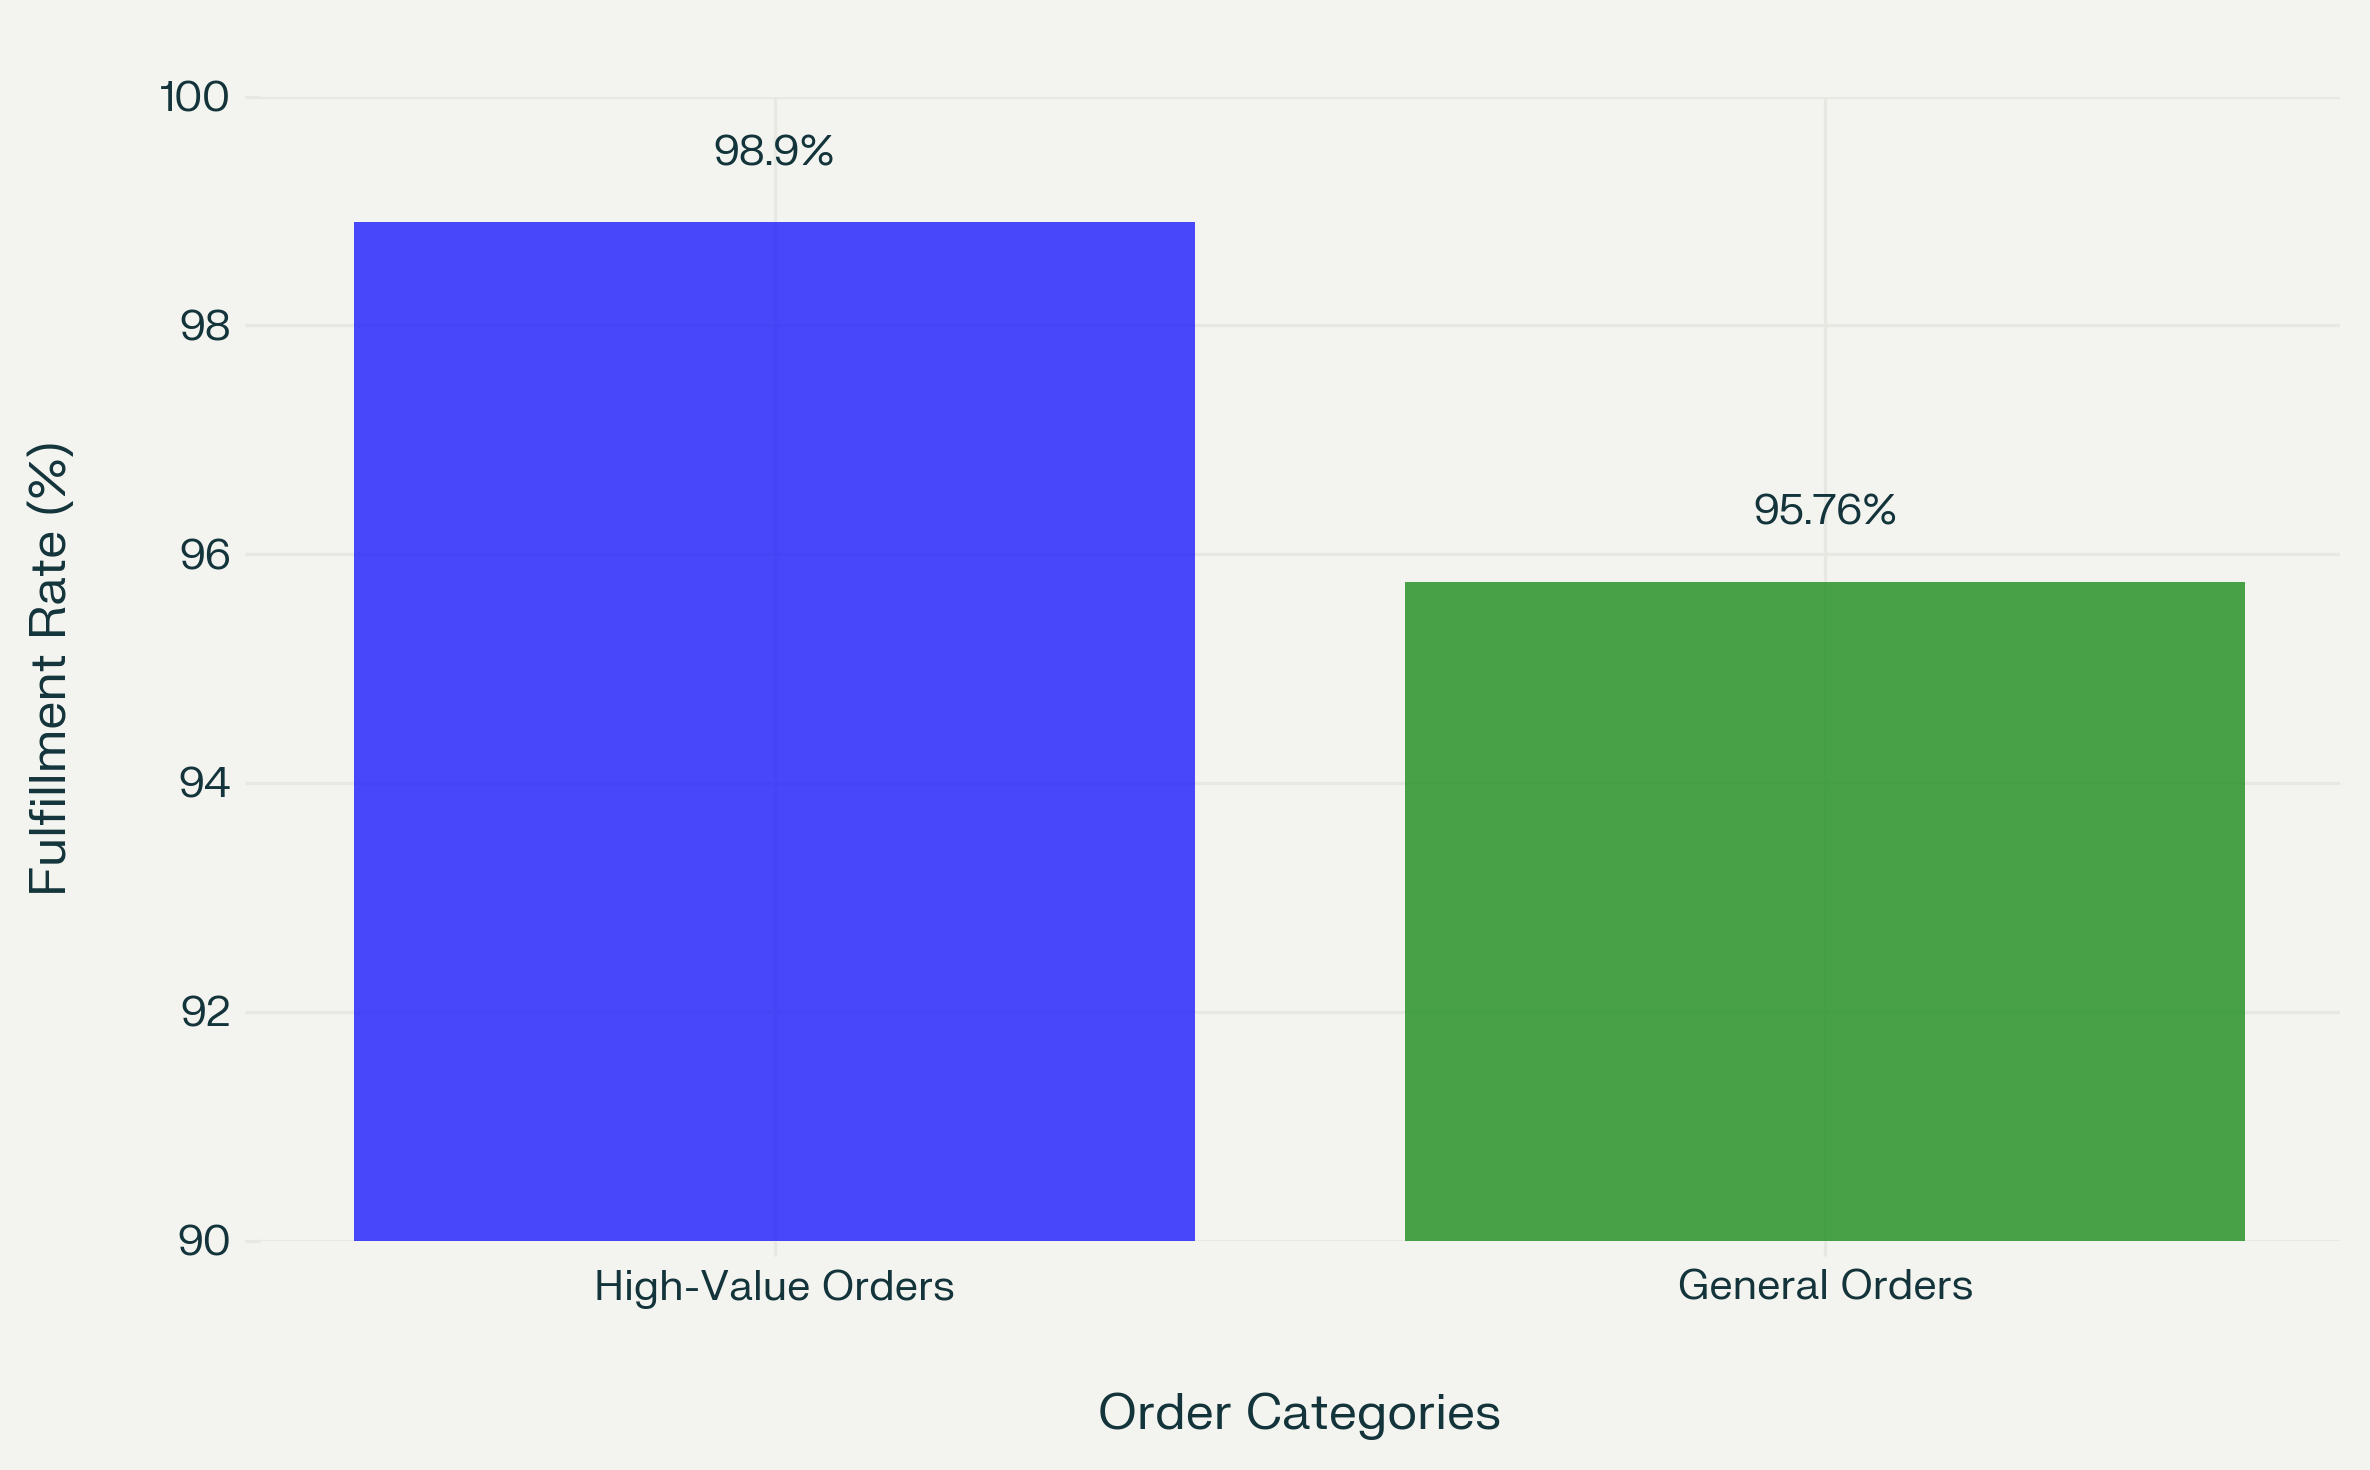
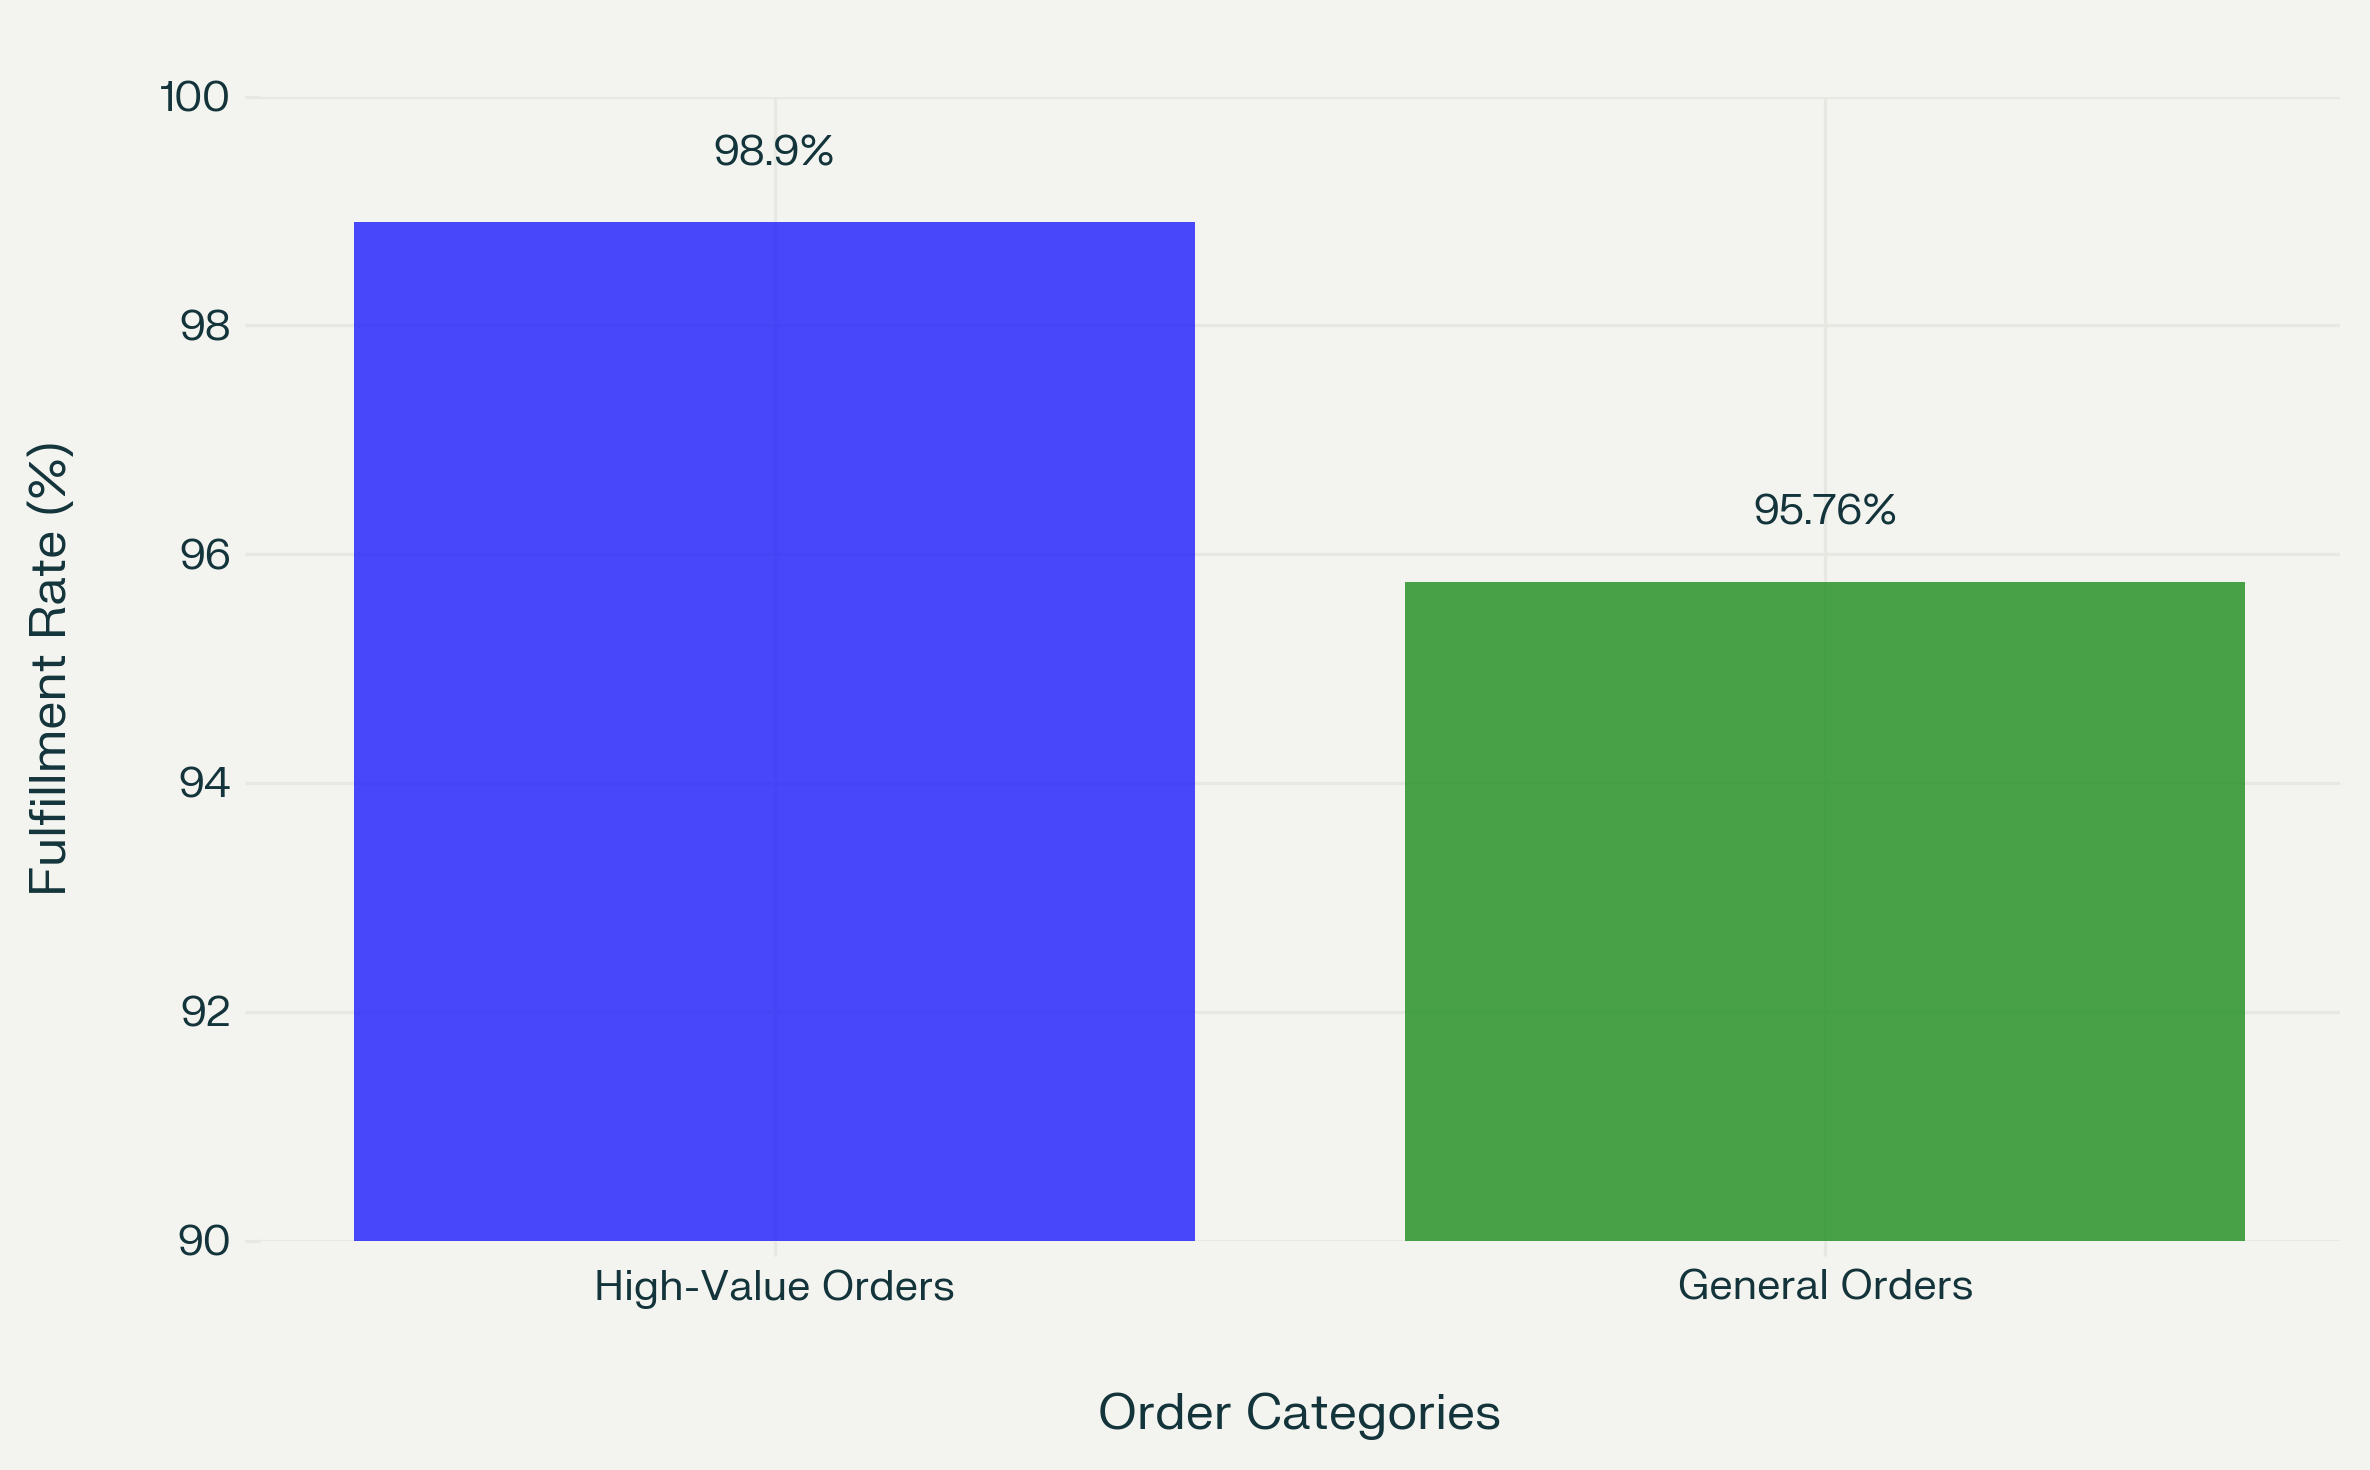
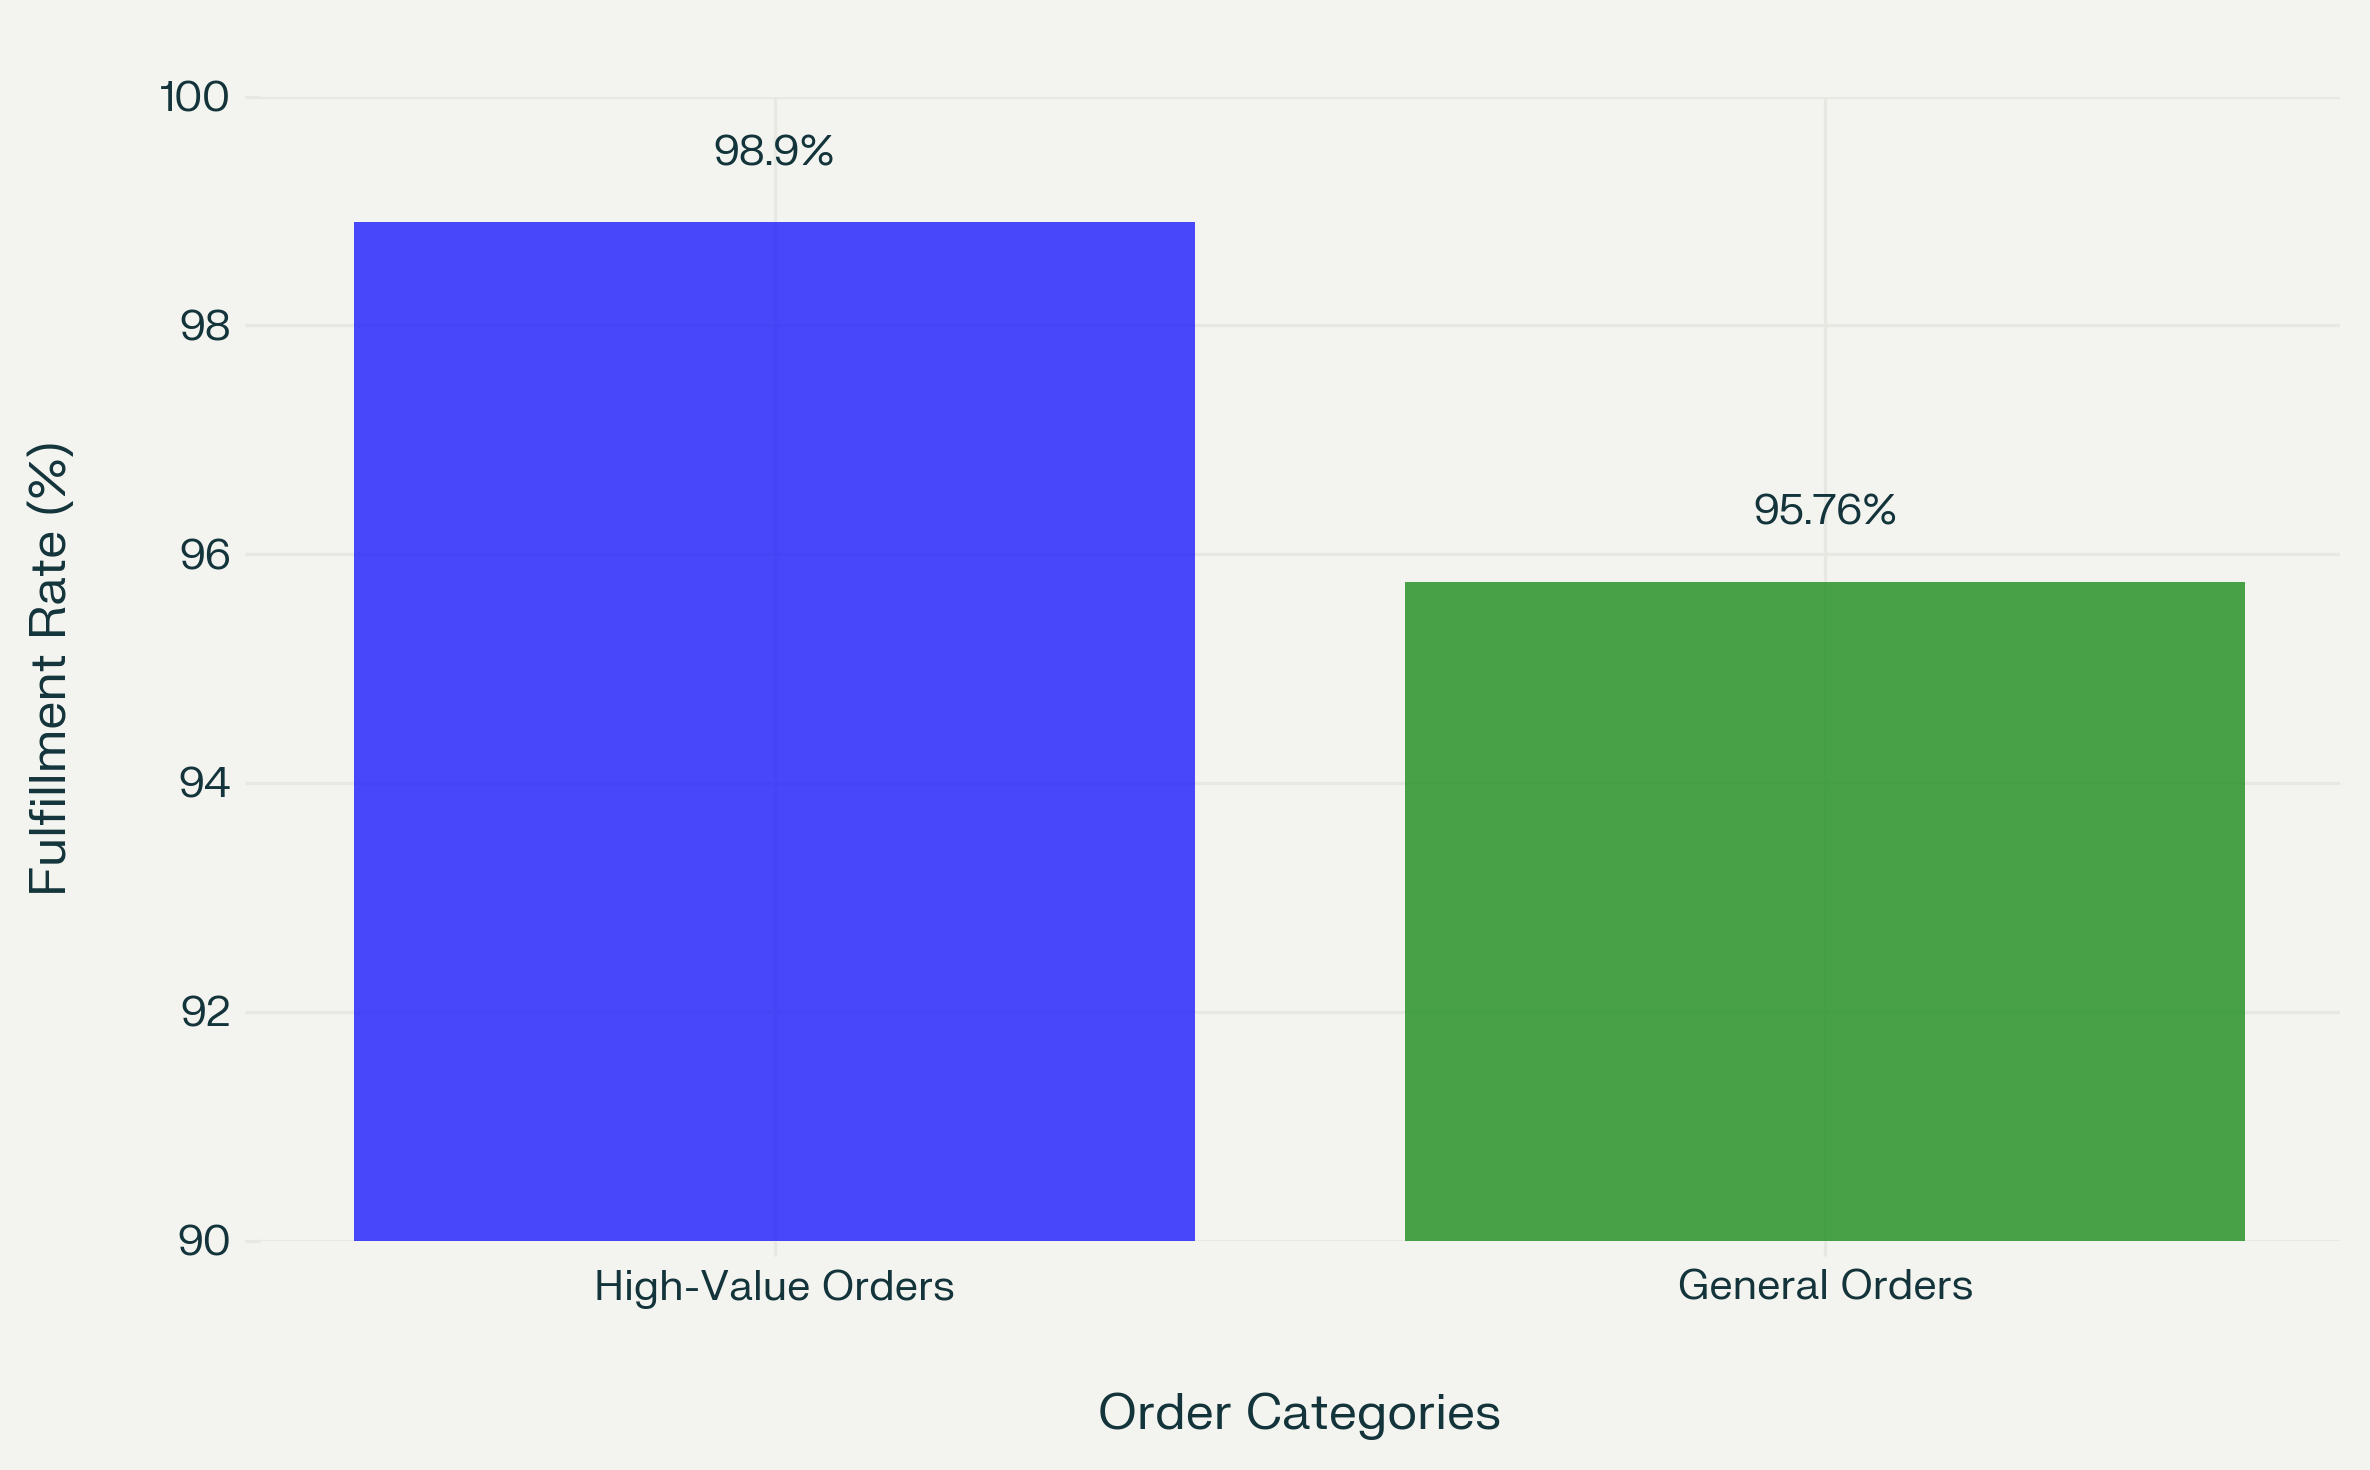

> General fulfillment rate of 95.76%

In [32]:
orders['order_date'].sort_values(ascending = True)

41119   2024-09-30
41121   2024-09-30
41086   2024-09-30
41087   2024-09-30
41088   2024-09-30
           ...    
38318   2025-04-10
38317   2025-04-10
38316   2025-04-10
38284   2025-04-10
38603   2025-04-10
Name: order_date, Length: 64459, dtype: datetime64[ns]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


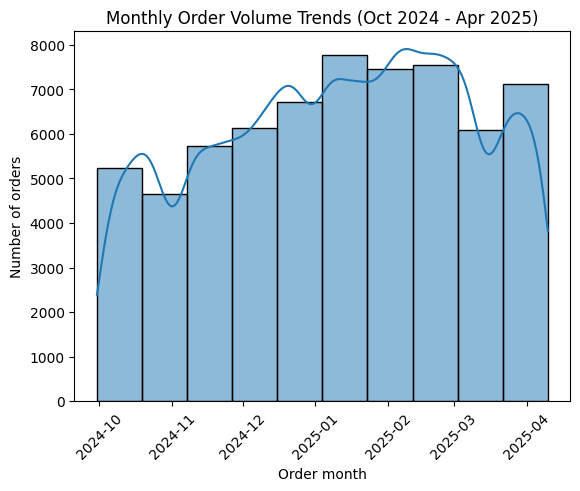

In [33]:
import seaborn as sns  
import matplotlib.pyplot as plt

# Create the histogram using Seaborn  
sns.histplot(orders['order_date'], bins=10, kde=True)  

# Rotate x labels for better readability if needed  
plt.xticks(rotation=45)  
plt.xlabel('Order month')  
plt.ylabel('Number of orders')  
plt.title('Monthly Order Volume Trends (Oct 2024 - Apr 2025)')  
plt.show()  

In [34]:
orders['weekday'] = orders['order_date'].dt.day_name()

In [35]:
orders['new_year_period'] = orders['order_date'].apply(
    lambda x: 'Before New Year' if x < pd.Timestamp('2025-01-01') else 'After New Year'
)

In [36]:
year_count = orders.groupby('new_year_period')['order_id'].count().reset_index()  
year_count

,new_year_period,order_id
0,After New Year,37036
1,Before New Year,27423


<Axes: xlabel='new_year_period', ylabel='order_id'>

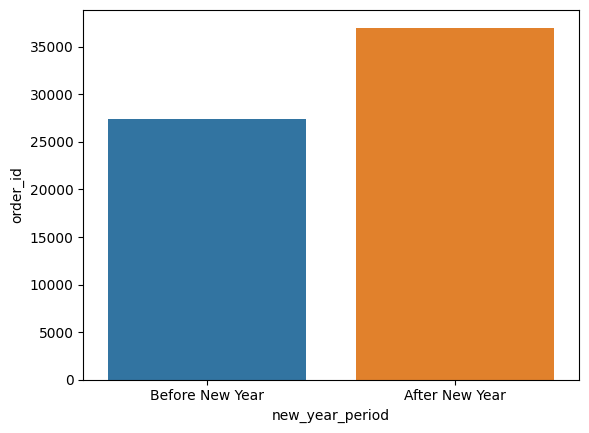

In [37]:
sns.barplot(x='new_year_period', y = 'order_id', data = year_count, order = ['Before New Year','After New Year'])

In [38]:
weekday_orders = pd.DataFrame(orders.groupby('weekday')['order_id'].count().reset_index())
weekday_orders

,weekday,order_id
0,Friday,9186
1,Monday,10138
2,Saturday,8815
3,Sunday,7955
4,Thursday,9987
5,Tuesday,9287
6,Wednesday,9091


In [39]:
#Is weekend or not
orders['is_weekend'] = orders['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id,weekday,new_year_period,is_weekend
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,0,Noida,3,5235,Thursday,After New Year,Weekday
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,0,Greater NOIDA,6,7622,Thursday,After New Year,Weekday
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,0,Noida,3,3827,Wednesday,After New Year,Weekday
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,0,Noida,3,2223,Thursday,Before New Year,Weekday
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,0,Gomti Nagar,1,6903,Monday,Before New Year,Weekday


In [40]:
orders_pivot = pd.DataFrame(orders.groupby(['is_weekend','new_year_period'])['order_id'].agg('count').reset_index())
orders_pivot

,is_weekend,new_year_period,order_id
0,Weekday,After New Year,27550
1,Weekday,Before New Year,20139
2,Weekend,After New Year,9486
3,Weekend,Before New Year,7284


In [41]:
weekday_ny_counts = orders.groupby(['weekday', 'new_year_period'])['order_id'].nunique().reset_index(name='order_count')
weekday_ny_counts

,weekday,new_year_period,order_count
0,Friday,After New Year,5348
1,Friday,Before New Year,3838
2,Monday,After New Year,5801
3,Monday,Before New Year,4337
4,Saturday,After New Year,5108
5,Saturday,Before New Year,3707
6,Sunday,After New Year,4378
7,Sunday,Before New Year,3577
8,Thursday,After New Year,6038
9,Thursday,Before New Year,3949


In [42]:
pivot_data = weekday_ny_counts.pivot(index='weekday', columns='new_year_period', values='order_count')
pivot_data

new_year_period,After New Year,Before New Year
weekday,,
Friday,5348,3838
Monday,5801,4337
Saturday,5108,3707
Sunday,4378,3577
Thursday,6038,3949
Tuesday,5050,4237
Wednesday,5313,3778


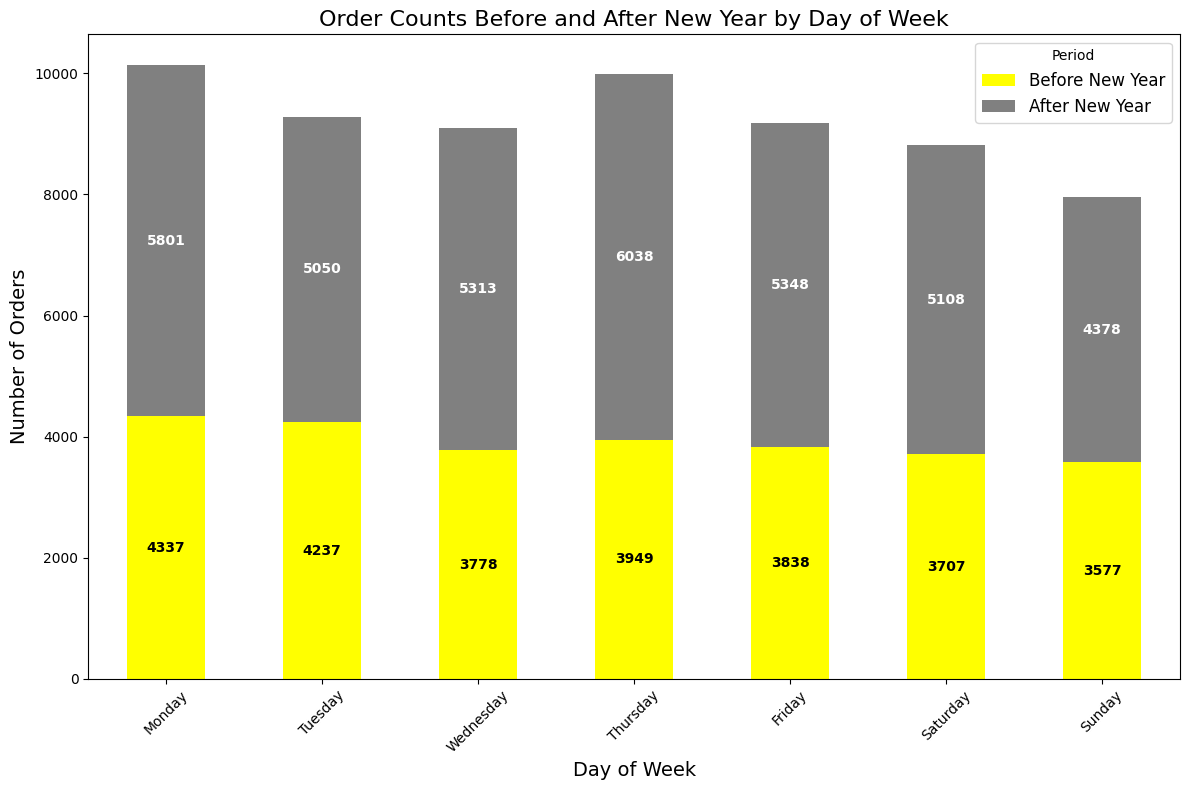

In [43]:
# Ensure days of week are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(day_order)
# Reorder columns to switch the stack: 'Before New Year' below, 'After New Year' on top
pivot_data = pivot_data[['Before New Year', 'After New Year']]

# Ensure days are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(day_order)

# Plot
ax = pivot_data.plot(kind='bar', stacked=True, 
                     color=['yellow', 'grey'], figsize=(12, 8))  # Changed color order too

plt.title('Order Counts Before and After New Year by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Period', fontsize=12)

# Add data labels on the bars
for i, day in enumerate(pivot_data.index):
    before_val = pivot_data.loc[day, 'Before New Year'] if 'Before New Year' in pivot_data.columns else 0
    after_val = pivot_data.loc[day, 'After New Year'] if 'After New Year' in pivot_data.columns else 0
    
    # Label for 'Before New Year' (bottom)
    if before_val > 0:
        ax.text(i, before_val / 2, f'{int(before_val)}', 
                ha='center', va='center', color='black', fontweight='bold')
    
    # Label for 'After New Year' (top)
    if after_val > 0:
        ax.text(i, before_val + after_val / 2, f'{int(after_val)}', 
                ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


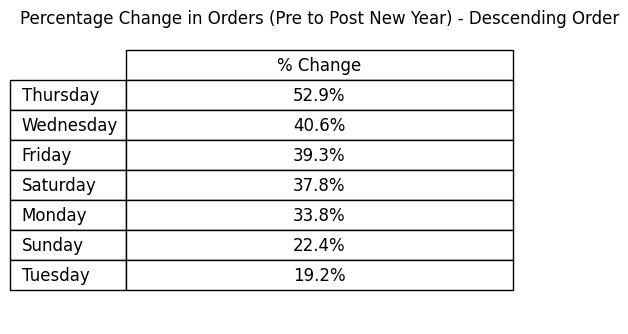

In [44]:
# After creating your stacked bar chart:

# Calculate percentage change from pre to post New Year
# Using try/except to handle potential division errors
pivot_data_with_pct = pivot_data.copy()

try:
    # Formula: ((After - Before) / Before) * 100
    # Note: using percentage CHANGE formula instead of decline
    pivot_data_with_pct['% Change'] = ((pivot_data['After New Year'] - pivot_data['Before New Year']) / 
                                      pivot_data['Before New Year']) * 100
    
    # Handle potential division by zero or missing values
    pivot_data_with_pct['% Change'] = pivot_data_with_pct['% Change'].fillna(0)
    pivot_data_with_pct['% Change'] = pivot_data_with_pct['% Change'].replace([float('inf'), -float('inf')], 0)
    
except TypeError as e:
    # Handle the "can't multiply sequence by non-int of type 'float'" error
    print(f"Error in calculation: {e}")
    # Alternative calculation method using numpy where available
    import numpy as np
    before = np.array(pivot_data['Before New Year'].values, dtype=float)
    after = np.array(pivot_data['After New Year'].values, dtype=float)
    change = np.zeros_like(before)
    mask = before != 0
    change[mask] = ((after[mask] - before[mask]) / before[mask]) * 100
    pivot_data_with_pct['% Change'] = change

# Sort the percentage change in descending order
sorted_change = pivot_data_with_pct.sort_values(by='% Change', ascending=False)

# Display the sorted table below the chart
plt.figure(figsize=(5, 4))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Create a formatted table with rounded percentages
table_data = sorted_change[['% Change']].copy()
table_data['% Change'] = table_data['% Change'].round(1).astype(str) + '%'

table = plt.table(
    cellText=table_data.values,
    rowLabels=table_data.index,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.8)

plt.title('Percentage Change in Orders (Pre to Post New Year) - Descending Order', y=0.95)
plt.show()

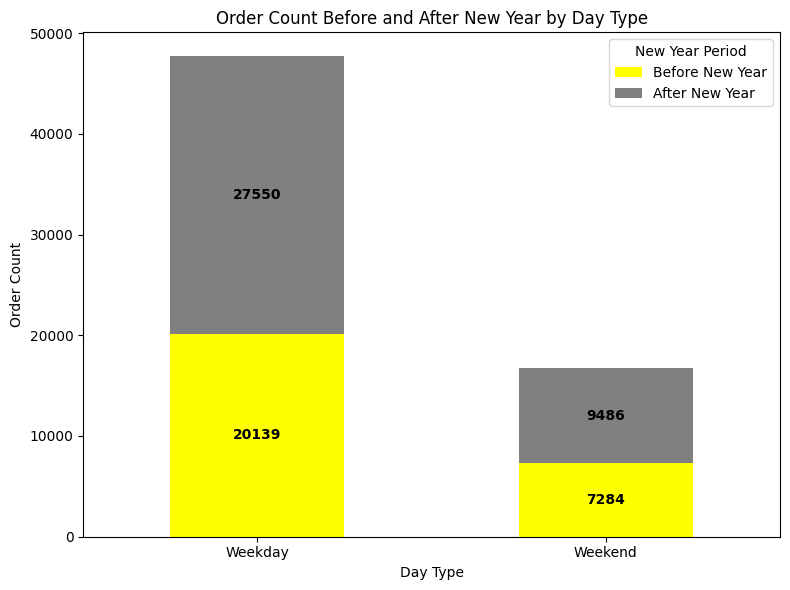

In [45]:
pivot_df = orders_pivot.pivot(index='is_weekend', columns='new_year_period', values='order_id')
pivot_df = pivot_df[['Before New Year', 'After New Year']]

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=['yellow','grey'])

for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                fontweight='bold'
            )

plt.title('Order Count Before and After New Year by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Order Count')
plt.legend(title='New Year Period')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id,weekday,new_year_period,is_weekend
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,0,Noida,3,5235,Thursday,After New Year,Weekday
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,0,Greater NOIDA,6,7622,Thursday,After New Year,Weekday
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,0,Noida,3,3827,Wednesday,After New Year,Weekday
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,0,Noida,3,2223,Thursday,Before New Year,Weekday
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,0,Gomti Nagar,1,6903,Monday,Before New Year,Weekday


In [47]:
# Get the start of each week
orders['week_start'] = orders['order_date'] - pd.to_timedelta(orders['order_date'].dt.weekday, unit='d')
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id,weekday,new_year_period,is_weekend,week_start
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,0,Noida,3,5235,Thursday,After New Year,Weekday,2025-03-31
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,0,Greater NOIDA,6,7622,Thursday,After New Year,Weekday,2025-01-27
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,0,Noida,3,3827,Wednesday,After New Year,Weekday,2025-02-10
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,0,Noida,3,2223,Thursday,Before New Year,Weekday,2024-12-23
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,0,Gomti Nagar,1,6903,Monday,Before New Year,Weekday,2024-12-30


In [48]:
daily_counts = orders.groupby('order_date').size()
daily_counts

order_date
2024-09-30     52
2024-10-01    282
2024-10-02     67
2024-10-03    311
2024-10-04    311
             ... 
2025-04-06    279
2025-04-07    403
2025-04-08    401
2025-04-09    418
2025-04-10    407
Length: 190, dtype: int64

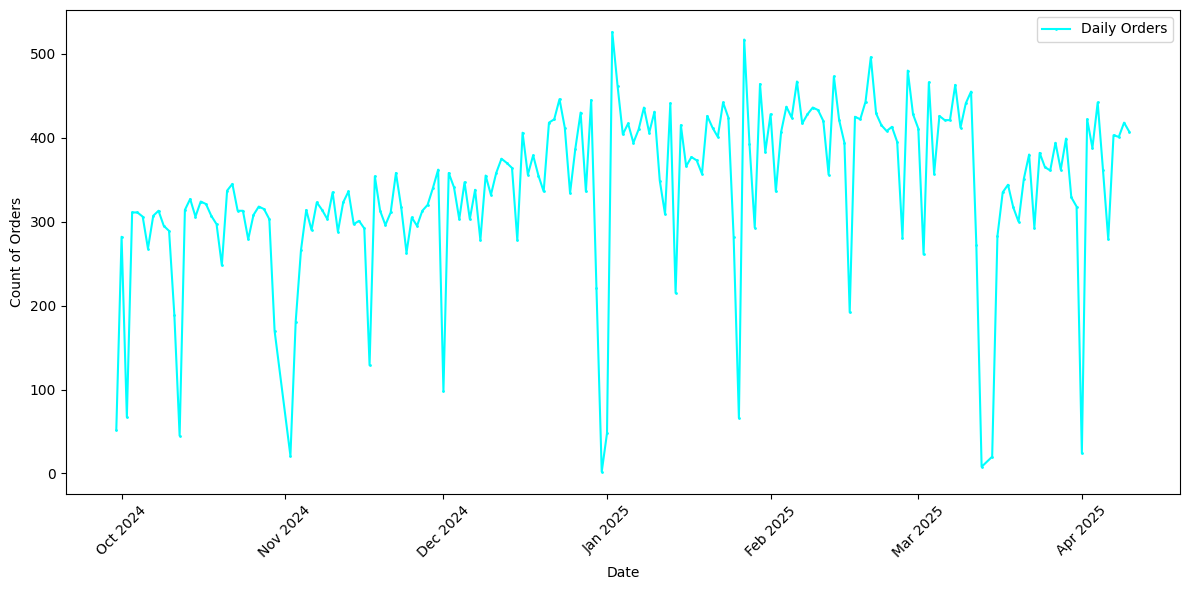

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', label='Daily Orders', color='cyan',markersize = 1)

from matplotlib.dates import DateFormatter, MonthLocator

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Count of Orders')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
monthly_counts = orders.groupby(orders['order_date'].dt.to_period('M')).size()
monthly_counts

order_date
2024-09       52
2024-10     8428
2024-11     8460
2024-12    10483
2025-01    11639
2025-02    11504
2025-03    10347
2025-04     3546
Freq: M, dtype: int64

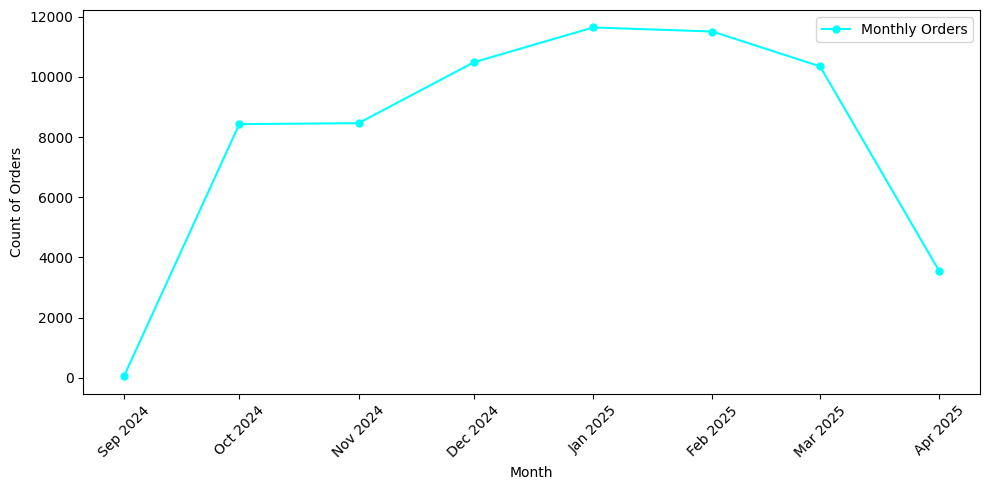

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, marker='o', linestyle='-', label='Monthly Orders', color='cyan', markersize = 5)

plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Count of Orders')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
weekly_counts = orders.groupby(orders['order_date'].dt.to_period('W')).size()
weekly_counts.sort_values(ascending = False)

order_date
2025-02-17/2025-02-23    3038
2025-02-03/2025-02-09    3016
2025-03-03/2025-03-09    2966
2025-01-27/2025-02-02    2814
2024-12-23/2024-12-29    2790
2025-01-06/2025-01-12    2735
2025-02-10/2025-02-16    2689
2024-12-16/2024-12-22    2672
2025-02-24/2025-03-02    2669
2025-03-24/2025-03-30    2592
2025-01-13/2025-01-19    2544
2025-01-20/2025-01-26    2453
2024-12-09/2024-12-15    2432
2025-03-17/2025-03-23    2320
2024-12-02/2024-12-08    2268
2025-03-31/2025-04-06    2235
2024-10-21/2024-10-27    2213
2024-11-18/2024-11-24    2212
2024-11-04/2024-11-10    2145
2024-10-14/2024-10-20    2130
2024-12-30/2025-01-05    2080
2024-11-25/2024-12-01    2033
2024-11-11/2024-11-17    1966
2024-10-07/2024-10-13    1752
2025-04-07/2025-04-13    1629
2024-09-30/2024-10-06    1597
2025-03-10/2025-03-16    1479
2024-10-28/2024-11-03     990
Freq: W-SUN, dtype: int64

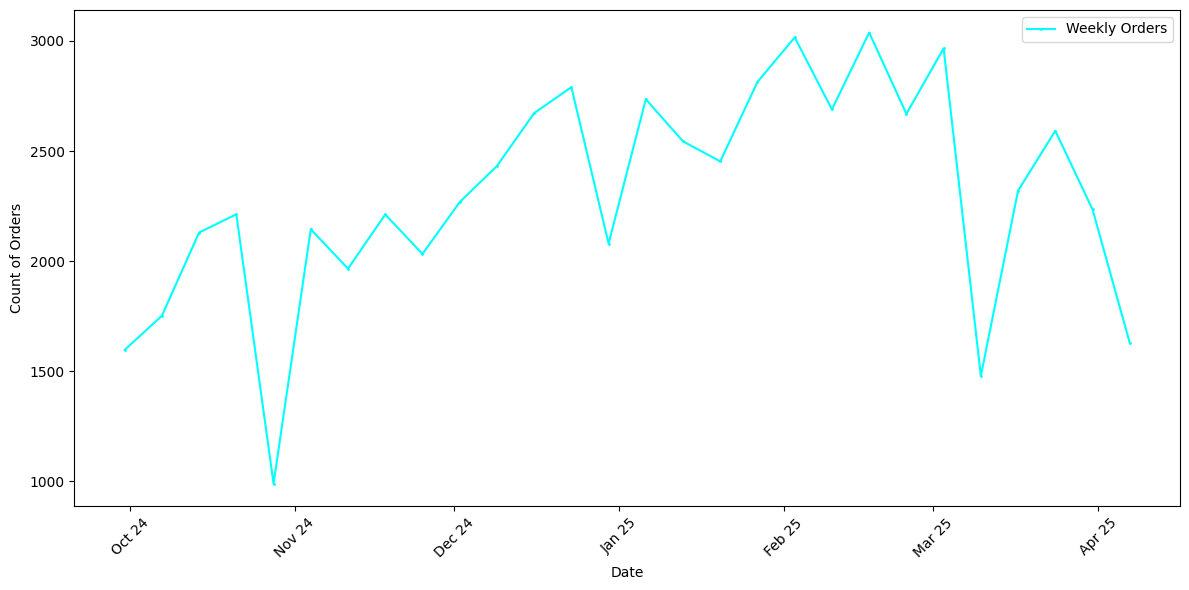

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index.to_timestamp(), weekly_counts.values, marker='o', linestyle='-', 
         label='Weekly Orders', color='cyan', markersize=1)

from matplotlib.dates import DateFormatter, MonthLocator

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Count of Orders')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id,weekday,new_year_period,is_weekend,week_start
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,0,Noida,3,5235,Thursday,After New Year,Weekday,2025-03-31
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,0,Greater NOIDA,6,7622,Thursday,After New Year,Weekday,2025-01-27
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,0,Noida,3,3827,Wednesday,After New Year,Weekday,2025-02-10
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,0,Noida,3,2223,Thursday,Before New Year,Weekday,2024-12-23
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,0,Gomti Nagar,1,6903,Monday,Before New Year,Weekday,2024-12-30


In [55]:
customers = orders.sample(100)['customer_name'].tolist()
customers

['Pal Tea Stall',
 'RR family bazar',
 'Karan Misthan Bandar Bada Gao',
 'vijay fast food',
 'Rk Kirana Store',
 'Bikaner Sweets ( Harola )',
 'Kritika General Store',
 'Sandeep hotel',
 'Pramod General Store',
 'Ateek General Store',
 'M MART GROCERY STORE',
 'Nancy Kirana Centre',
 'Gupta Bhojnalaya',
 'Adarsh Dhaba',
 'Guru Dairy',
 'kamal sweets',
 'Arif muradabadi',
 'Ashif Bhai Batase wale',
 'veggie delight cafe',
 'Babu daal wale',
 'Patanjali Store',
 'Mishra general Store',
 'Agrawal kirana indirapuram',
 'shiva store',
 'Amit GS',
 'Deepak General Store Ahmamu',
 'Baba Veg Point',
 'AK jaiswal general store',
 'P.H.D General Store',
 'Shiva Singh General store',
 'Rana general Store',
 'Uttam Food Store',
 'Gopal chai',
 'Sasta galla bhandar',
 'ANURAG GENERAL STORE',
 'Akash General Store',
 'SUKLA GENARAL STORE',
 'Manish ki Haveli',
 'Ashu bekery',
 'DHEERAJ GUPTA',
 'New Om Sweet',
 'Divakar Kirana Store',
 'Makrand Bhojnalaya',
 'Santosh Sasta kirana store',
 'Lucknow d

In [56]:
def categorize(name):
    name_lower = name.lower()

    if any(word in name_lower for word in ['kirana', 'general', 'provision', 'store', 'wholesale', 'trading']):
        return 'General/Kirana Store'
    elif any(word in name_lower for word in ['sweet', 'misthan', 'bhandar', 'sweets', 'bakery']):
        return 'Sweet Shop/Bakery'
    elif any(word in name_lower for word in ['hotel', 'restaurant', 'dhaba', 'zaika', 'biryani', 'fast food', 'al baik']):
        return 'Hotel/Restaurant/Dhaba'
    elif any(word in name_lower for word in ['tea', 'puri', 'jalebi', 'momos', 'chaumeen']):
        return 'Tea Stall / Snacks'
    elif 'canteen' in name_lower:
        return 'Canteen'
    elif 'hostel' in name_lower:
        return 'Hostel'
    elif any(word in name_lower for word in ['doodh', 'dairy']):
        return 'Dairy'
    elif any(word in name_lower for word in ['cafe', 'cake']):
        return 'Cafe/Bakery'
    else:
        return 'Others'

orders['SKU_category'] = orders['customer_name'].apply(categorize)
orders.head()

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id,primary_customer_id,weekday,new_year_period,is_weekend,week_start,SKU_category
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,0,Noida,3,5235,Thursday,After New Year,Weekday,2025-03-31,General/Kirana Store
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,0,Greater NOIDA,6,7622,Thursday,After New Year,Weekday,2025-01-27,Others
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,0,Noida,3,3827,Wednesday,After New Year,Weekday,2025-02-10,Others
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,0,Noida,3,2223,Thursday,Before New Year,Weekday,2024-12-23,Sweet Shop/Bakery
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,0,Gomti Nagar,1,6903,Monday,Before New Year,Weekday,2024-12-30,General/Kirana Store


In [57]:
orders_encoded = pd.get_dummies(orders['SKU_category']).astype(int)
orders_encoded.drop(columns = 'Tea Stall / Snacks')

,Cafe/Bakery,Canteen,Dairy,General/Kirana Store,Hostel,Hotel/Restaurant/Dhaba,Others,Sweet Shop/Bakery
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
64454,0,0,0,0,0,0,1,0
64455,0,0,0,1,0,0,0,0
64456,0,0,0,0,0,0,0,1
64457,0,0,0,0,0,0,1,0


In [58]:
final_df = pd.concat([orders,orders_encoded], axis=1)
final_df

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,...,SKU_category,Cafe/Bakery,Canteen,Dairy,General/Kirana Store,Hostel,Hotel/Restaurant/Dhaba,Others,Sweet Shop/Bakery,Tea Stall / Snacks
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,...,Others,0,0,0,0,0,0,1,0,0
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,...,Others,0,0,0,0,0,0,1,0,0
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,...,Sweet Shop/Bakery,0,0,0,0,0,0,0,1,0
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64454,2024-12-26,96152,948,Maa Bindwa,Utkarsh Pratap Singh,17,1650.00,130.00,1520.0,-60.0,...,Others,0,0,0,0,0,0,1,0,0
64455,2024-12-26,96153,5822,Yaduvanshi General Store,Raza Rizvi,5602,8255.00,935.00,7320.0,-455.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
64456,2024-12-25,96166,1655,Brijwasi sweet and restaurant (115),Ashutosh Tripathi,37,20970.00,2140.00,18830.0,-195.0,...,Sweet Shop/Bakery,0,0,0,0,0,0,0,1,0
64457,2024-12-26,96173,4268,Ashutosh Traders,Mohd Yaqoob,4293,3508.00,198.00,3310.0,-30.0,...,Others,0,0,0,0,0,0,1,0,0


In [59]:
final_df['poc_id'].corr(final_df['warehouse_id'])

0.5043626414969229

In [60]:
final_df['poc_id'].nunique()

97

In [61]:
final_df.groupby('poc_id')['order_id'].agg('count').reset_index(name = 'order_count')

,poc_id,order_count
0,2,2
1,3,4
2,6,18
3,9,82
4,15,3227
...,...,...
92,9368,75
93,9432,32
94,9494,6
95,9537,1


In [62]:
grouped = final_df.groupby(['warehouse_id','poc_id']).size().reset_index(name = 'order_count')
grouped

,warehouse_id,poc_id,order_count
0,1,15,3227
1,1,17,2596
2,1,23,57
3,1,24,2070
4,1,38,29
...,...,...,...
102,6,8500,103
103,6,8682,15
104,6,9267,25
105,6,9432,32


In [63]:
final_df

,order_date,order_id,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,...,SKU_category,Cafe/Bakery,Canteen,Dairy,General/Kirana Store,Hostel,Hotel/Restaurant/Dhaba,Others,Sweet Shop/Bakery,Tea Stall / Snacks
0,2025-04-03,136349,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
1,2025-01-30,110393,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,...,Others,0,0,0,0,0,0,1,0,0
2,2025-02-12,116427,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,...,Others,0,0,0,0,0,0,1,0,0
3,2024-12-26,96182,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,...,Sweet Shop/Bakery,0,0,0,0,0,0,0,1,0
4,2024-12-30,97858,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64454,2024-12-26,96152,948,Maa Bindwa,Utkarsh Pratap Singh,17,1650.00,130.00,1520.0,-60.0,...,Others,0,0,0,0,0,0,1,0,0
64455,2024-12-26,96153,5822,Yaduvanshi General Store,Raza Rizvi,5602,8255.00,935.00,7320.0,-455.0,...,General/Kirana Store,0,0,0,1,0,0,0,0,0
64456,2024-12-25,96166,1655,Brijwasi sweet and restaurant (115),Ashutosh Tripathi,37,20970.00,2140.00,18830.0,-195.0,...,Sweet Shop/Bakery,0,0,0,0,0,0,0,1,0
64457,2024-12-26,96173,4268,Ashutosh Traders,Mohd Yaqoob,4293,3508.00,198.00,3310.0,-30.0,...,Others,0,0,0,0,0,0,1,0,0
